## Cleaning and Exploring Employee Exit Surveys

A notebook analyzing exit surveys from employees who worked at the Department of Education, Training and Employment (DETE) or the Technical and Further Education (TAFE) Institute in Queensland. Exit surveys are a crucial part of any company; they help employers understand why people leave, and what processes can be improved to enhance retention.

![](https://images.unsplash.com/photo-1551897922-6a919947ae24?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=700&q=80)

Image source: [Unsplash](https://unsplash.com/photos/g-u2XlUqAXA)

#### Data Sources
The data for this notebook comes from Queensland, Australia. The original TAFE Data is no longer available.

[DETE Data Source](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

#### Questions to Answer
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

#### Data Details

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:
- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:
- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

##### Import Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
# Read in datasets. 
dete_init = pd.read_csv('dete_survey.csv')
tafe_init = pd.read_csv('tafe_survey.csv')

In [28]:
dete_init.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [29]:
dete_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [30]:
tafe_init.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


##### Initial Data Observations

In the `dete` dataset, many columns contain predominantly null values. This DataFrame also contains 'Not Stated' values that should instead be denoted as 'NaN'. Both DataFrames contain columns that are not needed to complete our analysis, and also contain columns that hold the same information, albeit under different headers. Let's read in the datasets once again, but this time set the `na_values` parameter to 'Not Stated'. 

##### Re-Read DataFrames

In [31]:
dete = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe = pd.read_csv('tafe_survey.csv', na_values='Not Stated')

##### Drop Columns Not Needed for Analysis

In [32]:
dete_updated = dete.drop(dete.columns[28:49], axis=1)
tafe_updated = tafe.drop(tafe.columns[17:66], axis=1)

In [33]:
dete_updated.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [34]:
tafe_updated.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


Note that the two DataFrames use different column names to record the same information. For instance, `tafe_updated` has a column called 'CESSATION YEAR' that appears to be the same as `dete_updated` 'Cease Date'. I will use vectorized string methods to rename the columns so that they match for each DataFrame. This is to prepare each dataset for a future merge.

##### Clean Column Names


In [35]:
dete_updated.columns = dete_updated.columns.str.strip().str.replace(' ', '_').str.lower()
print(dete_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [36]:
tafe_columns = {'Record ID': 'id',
                'CESSATION YEAR': 'cease_date',
                'Reason for ceasing employment': 'separationtype',
                'Gender. What is your Gender?': 'gender',
                'CurrentAge. Current Age': 'age',
                'Employment Type. Employment Type': 'employment_status',
                'Classification. Classification': 'position',
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
                }

In [37]:
tafe_updated = tafe_updated.rename(mapper=tafe_columns, axis=1)
print(tafe_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


I've now renamed columns in both the `dete_updated` and `tafe_updated` DataFrames so that key columns match between the two. Now that 'id' and 'cease_date' and 'separationtype' are represented in both dataframes, we can use these columns to merge the two and check data for accuracy.

In this notebook, we're interested in understanding whether employees who worked for a short time at the institute are resigning due to _dissatisfaction._ Accordingly, we're only going to look at `separationtype` values containing the string 'Resignation'. 

Specifically, we want to isolate:
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

In [38]:
dete_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [39]:
tafe_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [40]:
dete_resignations = dete_updated[dete_updated['separationtype'].str.contains('Resignation')].copy()
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [41]:
tafe_resignations = tafe_updated[tafe_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

We've now isolated solely those rows in the DataFrames in which employees _resigned_. Now, we can merge the DataFrames and use data exploratory methods to understand why people are resigning from their positions.

### Checking Dates for Logical Inconsistencies

In [42]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [43]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype('float')
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [46]:
# On to the `dete_resignations` column. 
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

The `dete_start_date` column contains reasonable values. Now, let's check the same for the `tafe_resignations` DataFrame.

In [47]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64

### BoxPlot of `cease_date` Columns

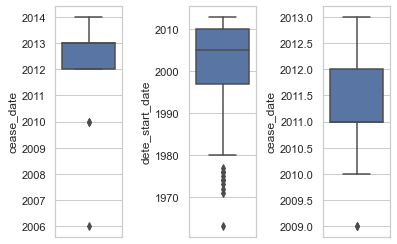

In [62]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3)

ax = sns.boxplot(y="cease_date", data=dete_resignations, orient='v', 
    ax=axes[0])
ax = sns.boxplot(y="dete_start_date", data=dete_resignations, orient='v', 
    ax=axes[1])
ax = sns.boxplot(y="cease_date", data=tafe_resignations, orient='v', 
    ax=axes[2])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=0.2)
plt.show()


The data seem reasonable. For the `dete_resignations` dataset, the earliest `cease_date` came in 2006, while the earliest `dete_start_date` is sometime in the 1960s. This is all reasonable. 

For the `tafe_resignations` dataset, the earliest `cease_date` is 2009. This, too, seems reasonable.

### Computing Service Times

Our goal is to answer this question:
- "Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?"

To do that, we'll have to compute the service time, or number of years, that an employee spent working at their job. The `tafe_resignations` dataset already has a 'service' column that provides this value. The `dete_resignations` dataset does not, so we will calculate that next by subtracting `cease_date` from `dete_start_date`.

In [64]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0


### Create a New Column on Dissatisfied Employees

Both datasets have a number of columns related to employee satisfaction. Specifically, in `tafe_updated`:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

And in `dete_updated`:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If an employee indicated that any of these factors caused them to resign, we'll mark them as "dissatisfied" in a new column.


In [66]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [67]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [68]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

In [77]:
tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']] = tafe_resignations[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']].applymap(update_vals)
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

True    332
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Learn about .applymap and .apply. Refresh pivot tables and .groupby.

##### Package Versions

In [45]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib,seaborn

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

numpy     : 1.20.1
pandas    : 1.2.4
matplotlib: 3.3.4
seaborn   : 0.11.2

